In [1]:
import numpy as np
import pandas as pd
import json
import codecs
import datetime

In [2]:
import sys

In [3]:
sys.path.append('.')

In [4]:
from vector_creator.score_vectors_assembly import file_list_with_unique_id, df_for_init_meta, create_call_logs_vector_for_unique_id, create_photo_gallery_vector_for_unique_id, create_app_install_vector_for_unique_id
from vector_creator.raw_to_df.rawdata_to_df import group_metadata
import vector_creator.preprocess.est_by_df_column as ebdf

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [6]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [7]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,9), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [8]:
path = '/Users/smuel/AndroidStudioProjects/LuckyMeIntgratedSDK/metadata_init_phase/'

In [9]:
lst = file_list_with_unique_id(path)

In [10]:
lst

{'unique_ids': ['588aeafe-5c4d-4bc9-84c5-8ae28029c733',
  '3e4c39d0-d2ec-45c3-91cc-4c80ccf171be',
  '20380cd2-055e-4f3a-a339-90a1c7df4e1a',
  '17ac0e20-b292-492c-9adc-faf60a068926',
  '1abd59a3-553f-43db-a329-90c28c72afdd',
  '236b91d2-cefb-405a-9de5-a3673ef1c736',
  '5e0b1bf2-2aba-4745-b91f-916554d51e9f',
  '05fa68e5-0ba3-4783-9c07-42740c4914c6',
  '12fa7561-2e77-4334-b9e1-6858ed27570f',
  '759240f7-1248-4334-aad5-fd384b524d3d',
  '25ba2284-51e3-4eb9-a2c8-fa3a0eaeeca9',
  '1362474c-0fb5-4932-a33d-5a30f23ac7e3',
  '199ea69c-5e20-4b53-9bfb-0534aaeb68d6',
  '25174909-3427-42d2-9e14-65f7c95f240b'],
 'file_list': ['05fa68e5-0ba3-4783-9c07-42740c4914c6_11-06-2021_09-53-01.json',
  '12fa7561-2e77-4334-b9e1-6858ed27570f_15-07-2021_21-30-54.json',
  '1362474c-0fb5-4932-a33d-5a30f23ac7e3_14-07-2021_12-18-21.json',
  '17ac0e20-b292-492c-9adc-faf60a068926_18-07-2021_18-32-18.json',
  '199ea69c-5e20-4b53-9bfb-0534aaeb68d6_22-07-2021_10-46-06.json',
  '1abd59a3-553f-43db-a329-90c28c72afdd_20-07-202

In [13]:
uid = lst.get('unique_ids')[7]
meta_files = lst.get('file_list')

In [14]:
uid

'05fa68e5-0ba3-4783-9c07-42740c4914c6'

CONVERT JSON METADATA BY UNIQUE_UID TO:  
1. Dict. OF DataFrames BY KEY FIELD {CallLogs, ImgMetaData, InstallApps} 
2. CONFIGURATION OF SAMPLING RATED AND LIFE CYCLE 
3. TUPLE OF GPS (LAT, LONG) IF EXISTS

In [15]:
loc_dict, df_dict = df_for_init_meta(uid, path, lst['file_list'])

In [16]:
loc_dict[0]

{'Latitude': 32.0875366,
 'Longitude': 34.7854512,
 'Sampling_Collect_Time': '09:53:01'}

In [17]:
df_dict.keys()

dict_keys(['05fa68e5-0ba3-4783-9c07-42740c4914c6_CallLogs', '05fa68e5-0ba3-4783-9c07-42740c4914c6_ImgMetaData', '05fa68e5-0ba3-4783-9c07-42740c4914c6_InstallApps'])

EXTRACT BY UNIQUE_UID: 
1. Extract call-logs DataFrame qiven by unique_uid
2. '05fa68e5-0ba3-4783-9c07-42740c4914c6_CallLogs' is Dict key in the format : UNIQUE-ID_FEILD-TYPE
3. the Dict Value for this key is the corresponding data frame 

In [18]:
df = df_dict['05fa68e5-0ba3-4783-9c07-42740c4914c6_CallLogs']

In [19]:
df = df.sort_values('CALL_DATE_TIME')

In [20]:
len(df)

493

In [21]:
df.head(10)

,CALL_NUMBER,CALL_DATE_TIME,CALL_TYPE,CALL_DURATION
0,588957574B738DBFD1C851F3F2FE248C1D20A20C,2020-07-12 15:33:27.936999936,INCOMING,42
1,588957574B738DBFD1C851F3F2FE248C1D20A20C,2020-07-13 06:22:11.676000000,INCOMING,43
2,588957574B738DBFD1C851F3F2FE248C1D20A20C,2020-07-13 09:59:22.920000000,NaN,0
3,588957574B738DBFD1C851F3F2FE248C1D20A20C,2020-07-13 09:59:38.879000064,OUTGOING,0
4,AE183B922FA98F156CF973AAED3FA7C194D3BA37,2020-07-13 10:33:59.004000000,MISSED,0
5,588957574B738DBFD1C851F3F2FE248C1D20A20C,2020-07-13 10:53:22.911000064,OUTGOING,63
6,C815DA5C8A969A183FF1E39B0DD11A5A72E7CD6F,2020-07-13 11:27:29.232000000,MISSED,0
7,AE183B922FA98F156CF973AAED3FA7C194D3BA37,2020-07-13 11:28:08.684999936,OUTGOING,0
8,27E6A4EB885A8569046B05ADC7613825F594B9E7,2020-07-13 11:28:56.890000128,OUTGOING,215
9,6E9F955A387A55273ED5779804D63ACA2D9E0D16,2020-07-13 11:29:24.489000192,MISSED,0


In [22]:
df0 = df.groupby(pd.Grouper(key='CALL_DATE_TIME', freq='D')).agg({'CALL_NUMBER' : ['count']})

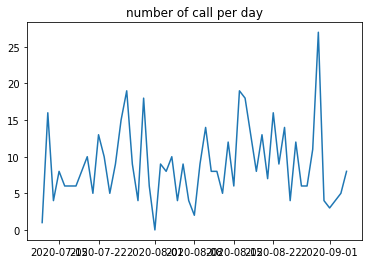

In [23]:
plt.plot(df0)
plt.title('number of call per day')
plt.show()

In [24]:
df1 = df.groupby(pd.Grouper(key='CALL_DATE_TIME', freq='D')).agg({'CALL_NUMBER' : ['nunique']})

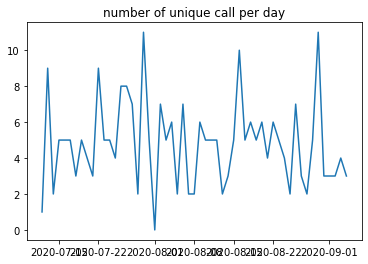

In [25]:
plt.plot(df1)
plt.title('number of unique call per day')
plt.show()

In [26]:
df2 = df.groupby(pd.Grouper(key='CALL_DATE_TIME', freq='D')).apply(lambda x : x.pivot_table(index=['CALL_NUMBER'], aggfunc='size'))
df3 = df2.groupby(level=0).agg(np.mean)

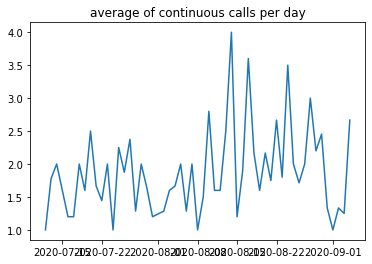

In [27]:
plt.plot(df3)
plt.title('average of continuous calls per day')
plt.show()

In [28]:
df4 = df.set_index('CALL_DATE_TIME')
df4 = df4.between_time('20:00:00', '08:00:00')
df5 = df4.groupby(pd.Grouper(freq='D')).agg({'CALL_NUMBER': ['count']})

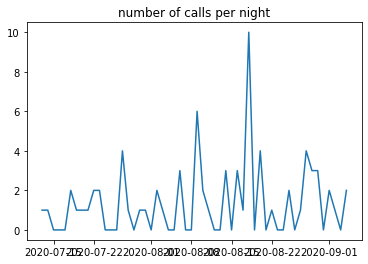

In [29]:
plt.plot(df5)
plt.title('number of calls per night')
plt.show()

In [22]:
lat = loc_dict[0]['Latitude']
long = loc_dict[0]['Longitude']

In [23]:
long_lat_tuple = (lat, long)

In [24]:
long_lat_tuple

(32.0875366, 34.7854512)

In [25]:
from vector_creator.preprocess import utils

In [26]:
df7 = utils.filter_by_weekends(df, long_lat_tuple, 'CALL_DATE_TIME', 'day_of_week')
df8 = df7.groupby(pd.Grouper(key='CALL_DATE_TIME', freq='D')).agg({'CALL_NUMBER' : ['count']})

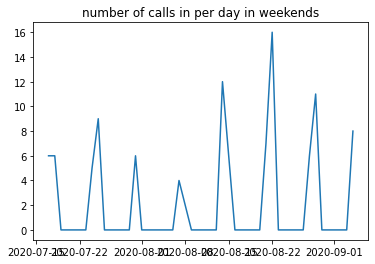

In [27]:
plt.plot(df8)
plt.title('number of calls in per day in weekends')
plt.show()

In [26]:
df.CALL_DURATION.size

493

In [30]:
vec1 = create_call_logs_vector_for_unique_id(df, (lat, long))

Israel


In [31]:
vec1

[8.963636363636363,
 5.197774476074567,
 4.438288931970152,
 4.818181818181818,
 2.397657258779601,
 1330.4,
 1368.625436507208,
 823.3025968804632,
 1.884281973170862,
 0.656806561332164,
 2.963636363636364,
 2.311737924463964,
 468.96363636363634,
 719.9013307047106,
 3.537037037037037,
 2.370442707229577,
 877.3888888888889,
 1231.0770565386242,
 2.3703703703703702,
 2.548029713009906,
 1.3518518518518519,
 1.806955772352304,
 0.9259259259259259,
 1.0156525333927473,
 0.46153846153846156,
 0.6032456592830048,
 48.71153846153846,
 121.9453434532899,
 0.5909090909090909,
 1.0937463105014513,
 57.90909090909091,
 156.62909548905338,
 0.46938775510204084,
 1.472219493622158,
 2.08,
 3.8044184838158905,
 0.0,
 309.22,
 862.4256788848534,
 0.0,
 1.08,
 1.863759641155479,
 2.0095238095238095,
 0.8439964051894945,
 0.5601374570446735,
 0.6701570680628273,
 5.537406456940944,
 5.5041312048537865,
 2.469670487371862,
 2.2841591278514217,
 1,
 4.153856376817899,
 6.634086868238694,
 6.76792105

In [32]:
len(vec1)

64

In [33]:
dg = df_dict['05fa68e5-0ba3-4783-9c07-42740c4914c6_ImgMetaData']
dg = dg.sort_values('IMAGE_DATE_TIME')
dg.head(10)

,IMAGE_TYPE,IMAGE_DATE_TIME
0,jpeg,2019-10-16 08:48:55
1,jpeg,2019-10-16 08:49:06
2,jpeg,2019-10-16 08:49:07
3,jpeg,2019-10-20 15:42:48
4,jpeg,2019-10-22 14:09:27
5,jpeg,2019-10-22 14:09:28
6,jpeg,2019-10-26 08:51:39
7,jpeg,2019-10-28 09:00:37
8,jpeg,2019-10-28 09:00:38
9,jpeg,2019-10-28 09:00:39


In [34]:
vec2 = create_photo_gallery_vector_for_unique_id(dg, (lat, long))

Israel


In [35]:
vec2

[1.2439862542955327,
 3.980915372443905,
 0.0,
 0.30584192439862545,
 0.47904568911844236,
 27.0,
 697.0,
 0.03729281767955801,
 0.962707182320442,
 0.5103189493433395,
 3.0857638515328807,
 0.0,
 0.41061946902654867,
 2.6663210155288968,
 1,
 0.9254841889352095,
 0.8724918342720102,
 0.8207171351125943,
 0.2297391051374809,
 2.629827502670255,
 3.5528756701952866]

In [36]:
len(vec2)

21

In [37]:
vec = vec1 + vec2

In [38]:
len(vec)

85

In [39]:
dp = df_dict['05fa68e5-0ba3-4783-9c07-42740c4914c6_InstallApps']

In [40]:
dp.head(10)

,INSTALL_DATETIME,APP_CATEGORY,APP_VARIANT
0,2020-11-17 16:37:25.507000064,Photography,Paid Feature
1,2020-10-18 17:29:02.138000128,Photography,Paid Feature
2,2020-03-13 08:10:21.480999936,Entertainment,Paid Feature
3,2020-04-12 08:01:00.431000064,Board,Paid Feature
4,2021-04-03 18:04:31.969000192,Action,Paid Feature
5,2020-06-24 12:48:53.188000000,Books & Reference,Paid Feature
6,2019-11-30 18:04:49.720000000,Puzzle,Free
7,2021-05-09 11:45:15.904000000,Adventure,Paid Feature
8,2020-10-20 04:59:48.418999808,Photography,Paid Feature
9,2019-10-26 07:48:09.364000000,Action,Paid Feature


In [41]:
dp = dp.sort_values('INSTALL_DATETIME')

In [42]:
vec3 = create_app_install_vector_for_unique_id(dp, (lat, long))

Israel


In [43]:
vec3

[1.9523809523809523,
 2.170718346674568,
 0,
 8,
 1.0,
 6.0,
 0.024390243902439025,
 0.14634146341463414,
 14.621403850496835,
 24.808108995347013,
 0.0,
 124.4434375,
 0.7804878048780488,
 0.21951219512195122,
 0.4146341463414634,
 1,
 3,
 1,
 6,
 0.3902439024390244,
 0.6097560975609756,
 4.020843553362251]

In [44]:
len(vec3)

22

In [45]:
vec = vec + vec3

In [46]:
len(vec)

107

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [44]:
res = seasonal_decompose(df.CALL_DURATION, model='additive', period=1)

In [45]:
y = df.groupby(pd.Grouper(key='CALL_DATE_TIME', freq='D')).agg({'CALL_NUMBER' : ['count']}).to_numpy().T[0]

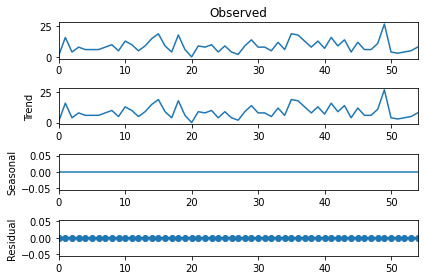

In [46]:
res = seasonal_decompose(y, model='additive', period=1)
res.plot()
plt.show()

In [7]:
from vector_creator.score_vectors_assembly import combine_score_vectors

In [8]:
path = '/Users/smuel/AndroidStudioProjects/LuckyMeIntgratedSDK/metadata_init_phase/'

In [9]:
res = combine_score_vectors(path)

236b91d2-cefb-405a-9de5-a3673ef1c736
call-logs:  2500
photo-gallery:  1436
install apps:  82
1362474c-0fb5-4932-a33d-5a30f23ac7e3
call-logs:  1400
photo-gallery:  1558
install apps:  22
5e0b1bf2-2aba-4745-b91f-916554d51e9f
call-logs:  918
photo-gallery:  1526
install apps:  14
25ba2284-51e3-4eb9-a2c8-fa3a0eaeeca9
call-logs:  15
photo-gallery:  2398
United States
install apps:  19
United States
759240f7-1248-4334-aad5-fd384b524d3d
call-logs:  167
United States
photo-gallery:  897
United States
install apps:  8
05fa68e5-0ba3-4783-9c07-42740c4914c6
call-logs:  493
Israel
photo-gallery:  724
Israel
install apps:  41
Israel
1abd59a3-553f-43db-a329-90c28c72afdd
call-logs:  1049
Philippines
photo-gallery:  462
Philippines
install apps:  17
Philippines
25174909-3427-42d2-9e14-65f7c95f240b
call-logs:  38
photo-gallery:  1369
Philippines
install apps:  4
12fa7561-2e77-4334-b9e1-6858ed27570f
call-logs:  3
photo-gallery:  1448
United States
install apps:  19
United States
17ac0e20-b292-492c-9adc-f

In [10]:
len(res)

107

In [11]:
res.head(60)

,236b91d2-cefb-405a-9de5-a3673ef1c736,1362474c-0fb5-4932-a33d-5a30f23ac7e3,5e0b1bf2-2aba-4745-b91f-916554d51e9f,25ba2284-51e3-4eb9-a2c8-fa3a0eaeeca9,759240f7-1248-4334-aad5-fd384b524d3d,05fa68e5-0ba3-4783-9c07-42740c4914c6,1abd59a3-553f-43db-a329-90c28c72afdd,25174909-3427-42d2-9e14-65f7c95f240b,12fa7561-2e77-4334-b9e1-6858ed27570f,17ac0e20-b292-492c-9adc-faf60a068926,199ea69c-5e20-4b53-9bfb-0534aaeb68d6,20380cd2-055e-4f3a-a339-90a1c7df4e1a,3e4c39d0-d2ec-45c3-91cc-4c80ccf171be,588aeafe-5c4d-4bc9-84c5-8ae28029c733
description,,,,,,,,,,,,,,
mean daily calls,5.747126,3.544304,2.067568,0.0,0.273770,8.963636,1.742525,0.0,0.0,0.527933,2.168000,5.524862,0.670702,0.0
std daily calls,6.015341,6.360474,9.786686,0.0,1.041185,5.197774,4.006451,0.0,0.0,1.875467,4.366056,6.682681,2.640353,0.0
q_scale daily calls,4.438289,2.219144,0.000000,0.0,0.000000,4.438289,0.000000,0.0,0.0,0.000000,0.000000,4.438289,0.000000,0.0
mean unique daily calls,3.508046,1.131646,0.299550,0.0,0.168852,4.818182,0.820598,0.0,0.0,0.245810,0.973333,2.127072,0.200969,0.0
std unique daily calls,3.105324,1.295713,0.652714,0.0,0.602737,2.397657,1.357044,0.0,0.0,0.621695,1.622947,1.970889,0.539751,0.0
mean duration daily calls,2394.163218,616.030380,95.770270,0.0,4.577049,1330.400000,86.566445,0.0,0.0,60.033520,156.370667,837.988950,18.784504,0.0
std duration daily calls,3145.601869,1648.114808,591.315606,0.0,28.655754,1368.625437,254.889351,0.0,0.0,370.175512,473.417897,1729.107449,88.763579,0.0
q_scale duration daily calls,1517.894815,6.657433,0.000000,0.0,0.000000,823.302597,0.000000,0.0,0.0,0.000000,0.000000,57.697756,0.000000,0.0
mean repetitive daily calls,1.562579,3.088751,7.631410,0.0,1.703535,1.884282,1.978265,0.0,0.0,2.036111,2.133150,2.744282,3.367692,0.0


In [12]:
res.to_csv('/Users/smuel/AndroidStudioProjects/LuckyMeIntgratedSDK/score_vec.csv')